<a href="https://colab.research.google.com/github/chandanareddy606/Sentiment-analysis/blob/main/NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('mount')

Mounted at mount


Importing libraries


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth',None)

In [12]:
df=pd.read_csv('/content/mount/My Drive/Sentiment analysis/train_2kmZucJ (1).csv')
df.head()#Checking the first few rows

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [13]:
df_test=pd.read_csv('/content/mount/My Drive/Sentiment analysis/test_oJQbWVk (1).csv')
df_test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n"
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing"
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [15]:
df.shape

(7920, 3)

In [16]:
#checking null values
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [17]:
import nltk
import string
nltk.download('punkt')
import re
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
contractions=pd.read_csv('/content/mount/My Drive/Sentiment analysis/contractions.csv')
contract_=dict(zip(contractions.Contraction,contractions.Meaning))

In [20]:
contract_

{"'aight": 'alright',
 "'cause": 'because',
 "'s": 'is',
 "'tis": 'it is',
 "'twas": 'it was',
 "I'd\tI": 'had',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'm": 'I am',
 "I'm'a": 'I am about to',
 "I'm'o": 'I am going to',
 "I've": 'I have',
 "ain't": 'is not',
 "amn't": 'am not',
 "aren't": 'are not',
 "can't": 'cannot',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "d'ye": 'do you',
 "daren't": 'dare not',
 "daresn't": 'dare not',
 "dasn't": 'dare not',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 'dunno': 'do not know',
 "e'er": 'ever',
 "everybody's": 'everybody is',
 "everyone's": 'everyone is',
 'finna': 'fixing',
 "g'day": 'good day',
 'gimme': 'give me',
 "giv'n": 'given',
 "gon't": 'go not',
 'gonna': 'going to',
 'gotta': 'got to',
 "had've": 'had have',
 "hadn't": 'had not',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had',
 "he'll": 'he will',
 "he's": 'he is',
 "he've": 'he have',
 "how'd"

In [21]:
def function(word):
  for i in word.split():
    if i in contract_.keys():
      word=word.replace(i,contract_[i])
    
  return word


    

In [22]:
df['tweetclean']=df['tweet'].apply(lambda x: function(x))

Data preprocessing

In [23]:
def text(word):
  x=word.lower()
  x=re.sub(r'http\S+','',x)  #removing links
  x=re.sub(r'[^a-zA-Z]',' ',x)  #having only numbers
  x=nltk.word_tokenize(x)
  x=[word for word in x if word not in set(string.punctuation)]
  x=[word.strip() for word in x if word not in set(nltk.corpus.stopwords.words('english')) and len(word) > 1]
  return ' '.join(x)


In [24]:
df['tweetclean']=df['tweetclean'].apply(lambda x: text(x))

In [25]:
df['tweetclean']

0           fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1                                finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2                               love would go talk makememories unplug relax iphone smartphone wifi connect
3                                                      wired know george made way iphone cute daventry home
4                                        amazing service apple even talk question unless pay stupid support
                                                       ...                                                 
7915                                           live loud lol liveoutloud selfie smile sony music headphones
7916    would like wish amazing day make every minute count tls today iphone accessories news life february
7917                           helping lovely year old neighbor ipad morning made realise actually need pad
7918                      fi

In [26]:
!pip install wordcloud

In [27]:
from wordcloud import WordCloud

Data visualization

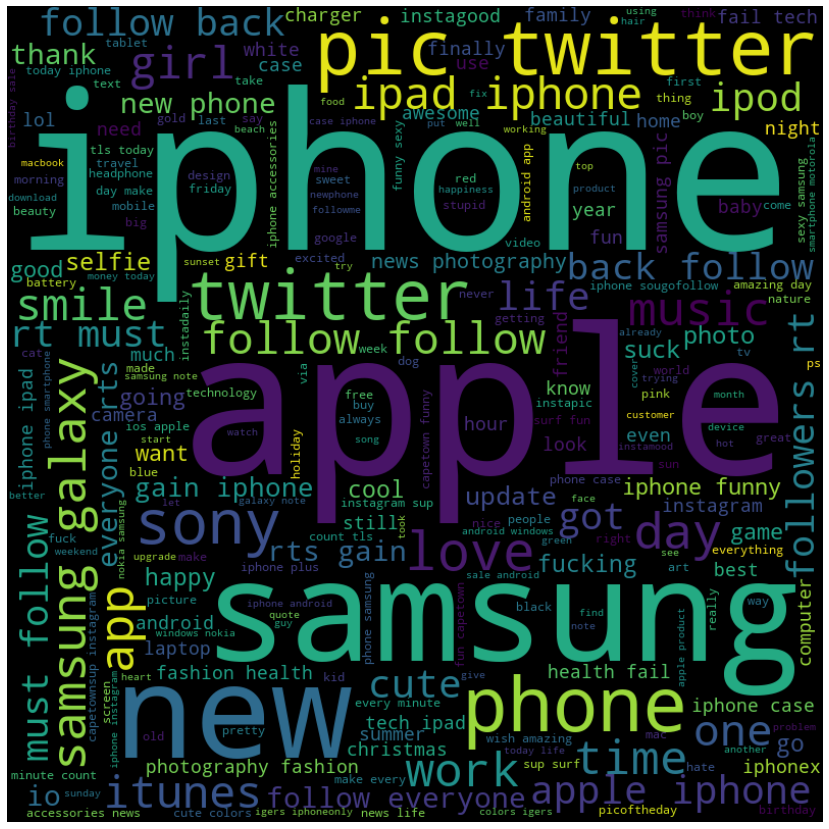

In [28]:
text=''
for words in df.tweetclean.values:
  text +=f"{words}"
wordcloud=WordCloud(width=800,height=800,max_words=250,background_color='black').generate(text)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

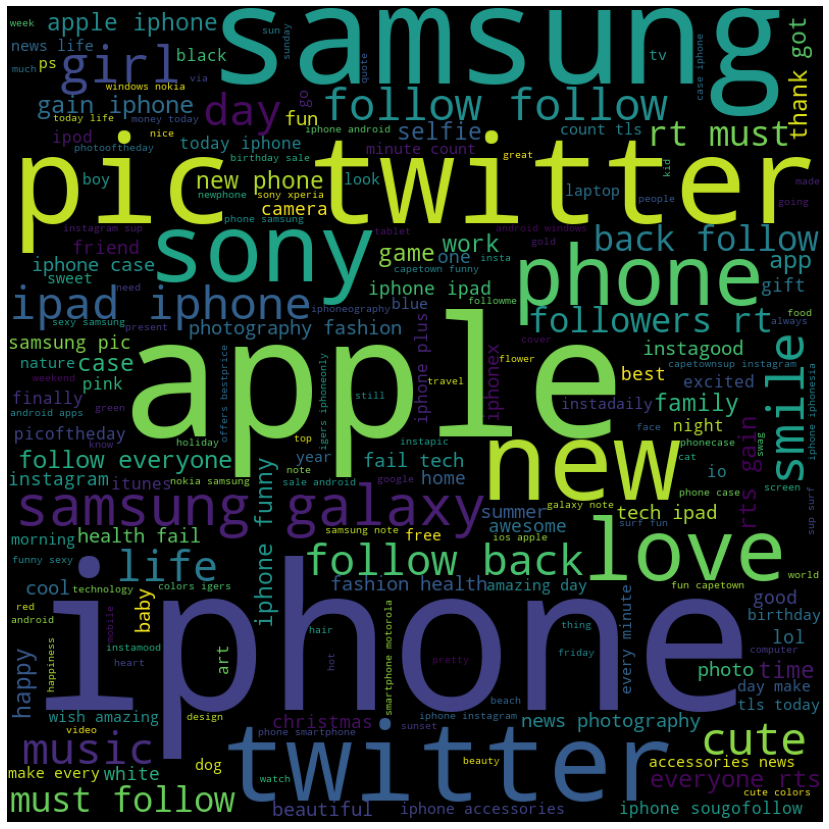

In [29]:
text=''
for word in df[df['label']==0].tweetclean.values:
  text += f"{word}"

wordcloud=WordCloud(width=800,height=800,max_words=200,background_color='black').generate(text)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


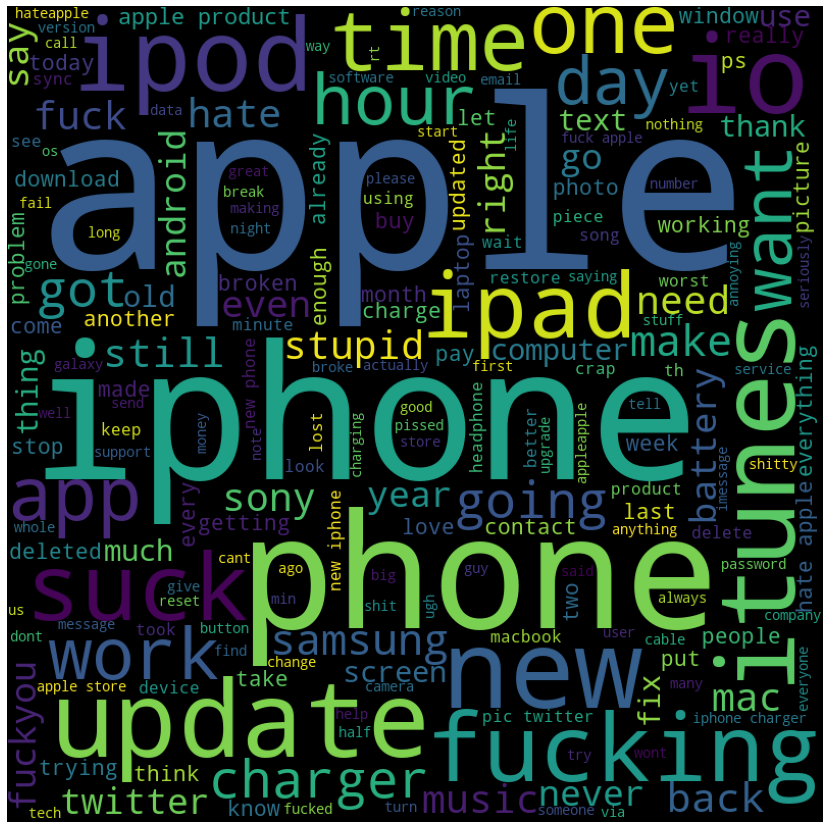

In [30]:
text=''
for word in df[df['label']==1].tweetclean.values:
  text += f"{word}"

wordcloud=WordCloud(width=800,height=800,max_words=200,background_color='black').generate(text)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

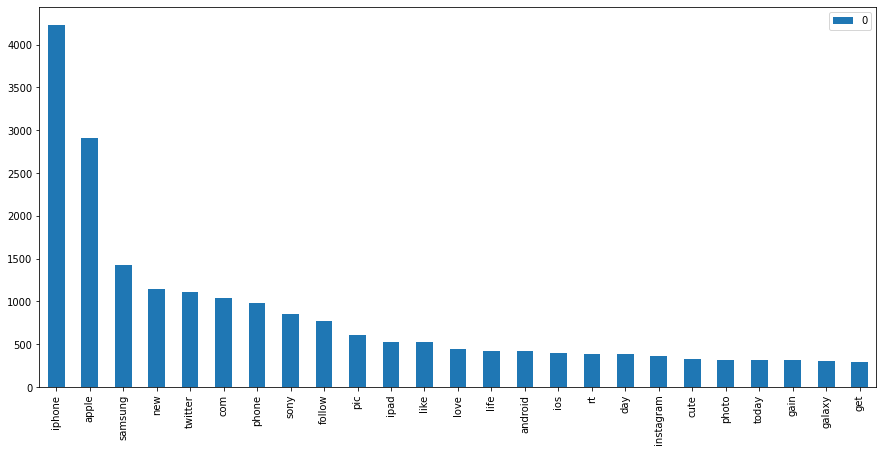

In [31]:
allreviews=pd.DataFrame(pd.Series((' '.join(df['tweetclean']).split())).value_counts())
allreviews=allreviews.head(25)
allreviews.plot(kind='bar',figsize=(15,7));

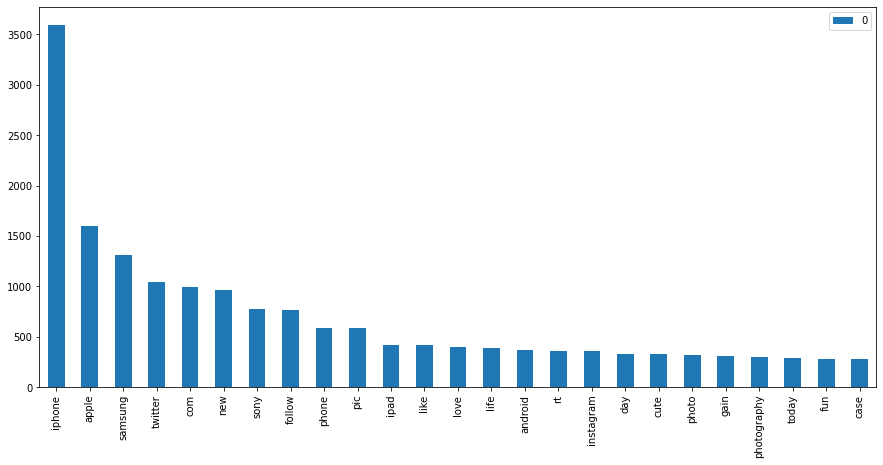

In [32]:
posreviews=pd.DataFrame(pd.Series((' '.join(df[df['label']==0]['tweetclean']).split())).value_counts())
posreviews=posreviews.head(25)
posreviews.plot(kind='bar',figsize=(15,7));

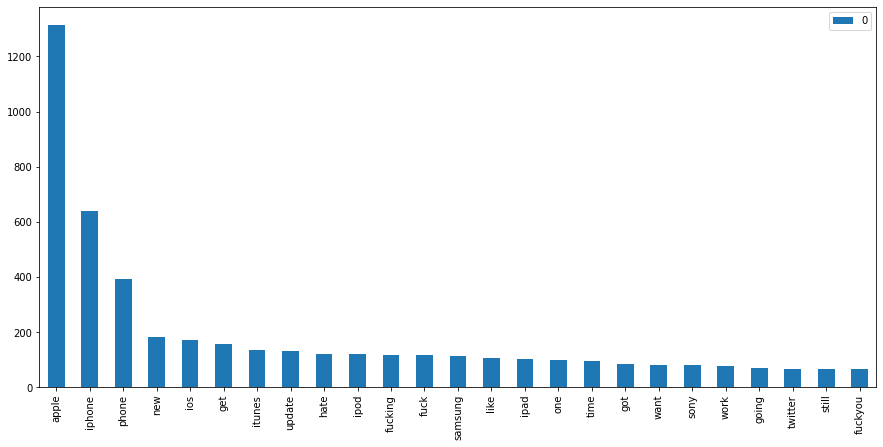

In [33]:
negreviews=pd.DataFrame(pd.Series((' '.join(df[df['label']==1]['tweetclean']).split())).value_counts())
negreviews=negreviews.head(25)
negreviews.plot(kind='bar',figsize=(15,7));

In [34]:
words=(' '.join(df['tweetclean']).split())
bigram_all=pd.Series(nltk.ngrams(words,2)).value_counts()
bigram_all=pd.DataFrame(bigram_all)
bigram_all[:25]

,0
"(twitter, com)",1023
"(pic, twitter)",552
"(apple, iphone)",261
"(iphone, iphone)",235
"(samsung, galaxy)",224
"(new, phone)",212
"(ipad, iphone)",191
"(iphone, apple)",173
"(follow, follow)",171
"(iphone, sougofollow)",165


In [35]:
words=' '.join(df[df['label']==0]['tweetclean']).split()
bigram_pos=pd.Series(nltk.ngrams(words,2)).value_counts()
bigram_pos=pd.DataFrame(bigram_pos)
bigram_pos[:25]

,0
"(twitter, com)",979
"(pic, twitter)",528
"(iphone, iphone)",222
"(samsung, galaxy)",210
"(new, phone)",186
"(ipad, iphone)",181
"(apple, iphone)",181
"(follow, follow)",171
"(iphone, sougofollow)",165
"(follow, back)",150


In [36]:
words=' '.join(df[df['label']==1]['tweetclean']).split()
bigram_neg=pd.Series(nltk.ngrams(words,2)).value_counts()
bigram_neg=pd.DataFrame(bigram_neg)
bigram_neg[:25]

,0
"(apple, iphone)",86
"(iphone, apple)",44
"(twitter, com)",44
"(fuck, apple)",40
"(apple, apple)",40
"(hate, apple)",35
"(fuckyou, apple)",33
"(apple, ios)",27
"(new, iphone)",27
"(thanks, apple)",27


In [37]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [38]:
def lemmatization(text):
  lr=WordNetLemmatizer()
  tag_list=pos_tag(text,tagset=None)
  lemma_words=[]
  for a,b in tag_list:
    if b.startswith('J'):  #adjective
      pos_val='a'
    elif b.startswith('V'):  #verb
        pos_val='v'
    elif b.startswith('R'):  #adverb
        pos_val='r'
    elif b.startswith('N'): #noun
        pos_val='n'
    else:
        pos_val='n'
    lemma_tokenize=lr.lemmatize(a,pos_val)
    lemma_words.append(lemma_tokenize)
  return ''.join(lemma_words)

In [39]:
df['tweetclean']=df['tweetclean'].apply(lambda x: lemmatization(x))

In [40]:
X=df['tweetclean']
y=df['label']

splitting the data into train and test

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,shuffle=True)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5544,)
(2376,)
(5544,)
(2376,)


In [43]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()


In [44]:
X_train_cv=cv.fit_transform(X_train)

print("Shape of X_train_cv",X_train_cv.shape)


Shape of X_train_cv (5544, 13751)


In [45]:
X_test_cv=cv.transform(X_test)
X_test_cv.shape

(2376, 13751)

In [46]:
from sklearn.naive_bayes import MultinomialNB
nb_cv=MultinomialNB()

In [47]:
model_cv=nb_cv.fit(X_train_cv,y_train)

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [49]:
print("Accuracy score of cv {}".format(accuracy_score(y_test,model_cv.predict(X_test_cv))))

Accuracy score of cv 0.9023569023569024


In [50]:
print("classification report using cv")
print(classification_report(y_test,model_cv.predict(X_test_cv)))


classification report using cv
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1768
           1       0.78      0.85      0.82       608

    accuracy                           0.90      2376
   macro avg       0.87      0.89      0.88      2376
weighted avg       0.91      0.90      0.90      2376



In [51]:
tf=TfidfVectorizer()

In [52]:
X_train_tf=tf.fit_transform(X_train)

X_train_tf.shape

(5544, 13751)

In [53]:
X_test_tf=tf.transform(X_test)
X_test_tf.shape

(2376, 13751)

In [54]:
nb_tf=MultinomialNB()

In [55]:
model_tf=nb_tf.fit(X_train_tf,y_train)

In [56]:
print("Accuracy score of tf {}".format(accuracy_score(y_test,model_tf.predict(X_test_tf))))

Accuracy score of tf 0.8417508417508418


In [57]:
print("classification report using tf")
print(classification_report(y_test,model_tf.predict(X_test_tf)))

classification report using tf
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1768
           1       0.87      0.45      0.59       608

    accuracy                           0.84      2376
   macro avg       0.86      0.71      0.75      2376
weighted avg       0.85      0.84      0.82      2376



In [58]:
from sklearn import svm

In [59]:
svm_lr=svm.SVC(kernel='rbf')
model_svm=svm_lr.fit(X_train_tf,y_train)

In [60]:
print("Accuracy score of tf {}".format(accuracy_score(y_test,model_svm.predict(X_test_tf))))

Accuracy score of tf 0.8804713804713805


In [61]:
df_test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n"
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing"
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for


In [62]:
df_test.head(5)

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n"
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing"
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for


In [63]:
def function(word):
  for i in word.split():
    if i in contract_.keys():
      word=word.replace(i,contract_[i])
    
  return word


In [64]:
df_test['tweet']=df_test['tweet'].apply(lambda x: function(x))

In [65]:
df_test['tweet']

0                                                                                                                      I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1                                                                                currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/
2                                                                                         I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but would not that block the screen?\n
3                                                                  My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing
4                                                                                                                             Been fighting iTunes all night! I only want the music I $&@*# paid for
               

In [66]:
def text(word):
  x=word.lower()
  x=re.sub(r'http\S+','',x)  #removing links
  x=re.sub(r'[^a-zA-Z]',' ',x)  #having only numbers
  x=nltk.word_tokenize(x)
  x=[word for word in x if word not in set(string.punctuation)]
  x=[word.strip() for word in x if word not in set(nltk.corpus.stopwords.words('english')) and len(word) > 1]
  return ' '.join(x)

In [67]:
df_test['tweet']=df_test['tweet'].apply(lambda x: text(x))

In [68]:
df_test.head()

,id,tweet
0,7921,hate new iphone upgrade let download apps ugh apple sucks
1,7922,currently shitting fucking pants apple imac cashmoney raddest swagswagswag
2,7923,like puts cd roms ipad possible yes would block screen
3,7924,ipod officially dead lost pictures videos sos concert vet camp hatinglife sobbing
4,7925,fighting itunes night want music paid


In [69]:
def lemmatization(text):
  lr=WordNetLemmatizer()
  tag_list=pos_tag(text,tagset=None)
  
  lemma_words=[]
  for a,b in tag_list:
    if b.startswith('J'):  #adjective
      pos_val='a'
    elif b.startswith('V'):  #verb
        pos_val='v'
    elif b.startswith('R'):  #adverb
        pos_val='r'
    elif b.startswith('N'): #noun
        pos_val='n'
    else:
        pos_val='n'
    lemma_tokenize=lr.lemmatize(a,pos_val)
    lemma_words.append(lemma_tokenize)
  return ''.join(lemma_words)

In [70]:
df_test['tweet']=df_test['tweet'].apply(lambda x:lemmatization(x))

In [71]:
test=cv.transform(df_test['tweet'])

In [72]:
pred_prob=model_cv.predict(test)

In [73]:
pred_prob

array([1, 1, 1, ..., 1, 1, 0])

In [74]:
final=pd.DataFrame()
final['id']=df_test['id']
final['label']=pred_prob

In [75]:
final

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1
...,...,...
1948,9869,0
1949,9870,0
1950,9871,1
1951,9872,1


In [77]:
final.to_csv('final_nlp.csv',index=False)

## Using Word2vec model

In [78]:
X=[]
for words in df['tweetclean'].values:
  X.append(nltk.word_tokenize(words))


In [79]:
y=df['label']

In [80]:
import gensim

In [81]:
emb_dim=100
word2vec=gensim.models.Word2Vec(sentences=X,size=emb_dim,window=5,min_count=1)

In [82]:
len(word2vec.wv.vocab)

17532

In [83]:
word2vec['icecream']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.09827449,  0.08640558, -0.09820215, -0.03465617, -0.11944973,
        0.08305439, -0.02068879, -0.01911862, -0.00912902,  0.0242094 ,
        0.02219637,  0.01000282, -0.07388759, -0.06646097, -0.07612826,
       -0.10019028, -0.01190372,  0.06559622, -0.08900861, -0.08900525,
       -0.08647726,  0.0031651 , -0.01807564,  0.05831353,  0.10148846,
        0.04964871, -0.01246226, -0.03314745, -0.10144026, -0.0882082 ,
        0.02806308, -0.04328355, -0.04701594,  0.22029974,  0.02264015,
       -0.02408049,  0.01417414, -0.00308024,  0.01787497, -0.11966383,
        0.04707916, -0.03525647,  0.0259713 , -0.05822549,  0.02010137,
       -0.02623676, -0.0243321 , -0.14906614, -0.10606074,  0.13196412,
        0.0464678 , -0.04217139,  0.06470249, -0.00517788, -0.02603181,
       -0.08398211, -0.03125713, -0.07747798, -0.06812794, -0.1517814 ,
       -0.06589483,  0.0392153 , -0.0341641 ,  0.07681748,  0.04842804,
       -0.12058093,  0.02595083, -0.09839445,  0.06479908,  0.06

In [84]:
word2vec['iphone']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-1.3148164 ,  1.129819  , -1.0274799 , -0.23239313, -1.6098373 ,
        1.0150605 , -0.32193136, -0.26124954, -0.25188425,  0.15444346,
        0.10160407, -0.08841661, -0.727003  , -0.8604673 , -0.874504  ,
       -0.9622611 , -0.25192928,  0.7408123 , -1.3312453 , -1.0542402 ,
       -0.8955799 ,  0.20793818, -0.273047  ,  0.6819579 ,  1.5742615 ,
        0.5925548 ,  0.02408797, -0.4941696 , -1.3382987 , -1.1112746 ,
        0.2995019 , -0.51426655, -0.70905626,  2.960956  ,  0.2712568 ,
       -0.38997406,  0.04493368,  0.01922309,  0.17847964, -1.6055589 ,
        0.62300676, -0.58949345,  0.460503  , -0.60127884,  0.4415476 ,
       -0.56480503, -0.31020102, -2.0100837 , -1.4462351 ,  1.8277607 ,
        0.37741667, -0.48062217,  0.80474216, -0.08380453, -0.37387407,
       -0.9934253 , -0.39376327, -1.1623679 , -0.86348367, -2.0765154 ,
       -0.9214645 ,  0.51259226, -0.26082453,  0.85887706,  0.60102946,
       -1.4546764 ,  0.17452455, -1.2436711 ,  0.86242384,  0.72

In [85]:
word2vec.wv.most_similar('iphone')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('usa', 0.998394250869751),
 ('woman', 0.9981799125671387),
 ('friends', 0.9979759454727173),
 ('sonylens', 0.9978265762329102),
 ('technology', 0.9977596402168274),
 ('gallery', 0.9976503252983093),
 ('lens', 0.9976216554641724),
 ('words', 0.9975969791412354),
 ('app', 0.997522234916687),
 ('iphoneography', 0.9975154399871826)]

In [86]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [87]:
token=Tokenizer()  
token.fit_on_texts(X)

In [88]:
token.word_index

{'iphone': 1,
 'apple': 2,
 'samsung': 3,
 'new': 4,
 'twitter': 5,
 'com': 6,
 'phone': 7,
 'sony': 8,
 'follow': 9,
 'pic': 10,
 'ipad': 11,
 'like': 12,
 'love': 13,
 'life': 14,
 'android': 15,
 'ios': 16,
 'rt': 17,
 'day': 18,
 'instagram': 19,
 'cute': 20,
 'photo': 21,
 'today': 22,
 'gain': 23,
 'galaxy': 24,
 'photography': 25,
 'get': 26,
 'got': 27,
 'back': 28,
 'fun': 29,
 'case': 30,
 'news': 31,
 'music': 32,
 'instagood': 33,
 'app': 34,
 'happy': 35,
 'beautiful': 36,
 'time': 37,
 'funny': 38,
 'lol': 39,
 'fashion': 40,
 'one': 41,
 'itunes': 42,
 'smile': 43,
 'tech': 44,
 'birthday': 45,
 'work': 46,
 'ps': 47,
 'ipod': 48,
 'iphonex': 49,
 'photooftheday': 50,
 'finally': 51,
 'everyone': 52,
 'good': 53,
 'amazing': 54,
 'make': 55,
 'girl': 56,
 'apps': 57,
 'would': 58,
 'must': 59,
 'update': 60,
 'sougofollow': 61,
 'note': 62,
 'mac': 63,
 'selfie': 64,
 'followers': 65,
 'want': 66,
 'fail': 67,
 'thanks': 68,
 'free': 69,
 'rts': 70,
 'home': 71,
 'friend

In [89]:
X=token.texts_to_sequences(X)

In [90]:
X[3]

[2019, 109, 3908, 163, 246, 1, 20, 6075, 71]

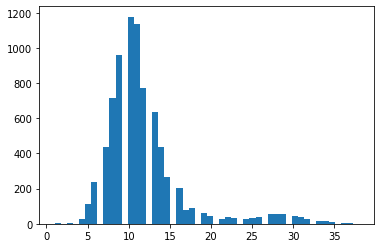

In [91]:
plt.hist([len(x) for x in X],bins=50)
plt.show()

In [92]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [93]:
max_len=12
X=pad_sequences(X,maxlen=max_len)

In [94]:
X[150]

array([   0,    0, 1164,  996,    3,   94,  211,   14,  368,  466,  122,
         33], dtype=int32)

In [95]:
wordindex=token.word_index

In [96]:
wordindex.items()

dict_items([('iphone', 1), ('apple', 2), ('samsung', 3), ('new', 4), ('twitter', 5), ('com', 6), ('phone', 7), ('sony', 8), ('follow', 9), ('pic', 10), ('ipad', 11), ('like', 12), ('love', 13), ('life', 14), ('android', 15), ('ios', 16), ('rt', 17), ('day', 18), ('instagram', 19), ('cute', 20), ('photo', 21), ('today', 22), ('gain', 23), ('galaxy', 24), ('photography', 25), ('get', 26), ('got', 27), ('back', 28), ('fun', 29), ('case', 30), ('news', 31), ('music', 32), ('instagood', 33), ('app', 34), ('happy', 35), ('beautiful', 36), ('time', 37), ('funny', 38), ('lol', 39), ('fashion', 40), ('one', 41), ('itunes', 42), ('smile', 43), ('tech', 44), ('birthday', 45), ('work', 46), ('ps', 47), ('ipod', 48), ('iphonex', 49), ('photooftheday', 50), ('finally', 51), ('everyone', 52), ('good', 53), ('amazing', 54), ('make', 55), ('girl', 56), ('apps', 57), ('would', 58), ('must', 59), ('update', 60), ('sougofollow', 61), ('note', 62), ('mac', 63), ('selfie', 64), ('followers', 65), ('want', 6

In [97]:
len(wordindex)

17532

In [98]:
def getweights(model,vocab):
  vocab_size=len(vocab)+1
  weight_matrix=np.zeros((vocab_size,emb_dim))
  for word ,index in wordindex.items():
    weight_matrix[index] = model[word]
    return weight_matrix

In [99]:
emd_layer=getweights(word2vec,wordindex)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [101]:
model=Sequential()
model.add(Embedding(input_dim=(len(wordindex)+1),output_dim=emb_dim,weights=[emd_layer],input_length=max_len,trainable=False))
model.add(LSTM(units=256,return_sequences=True,recurrent_dropout=0.25,dropout=0.25))
model.add(LSTM(units=128,return_sequences=True,recurrent_dropout=0.25,dropout=0.25))
model.add(LSTM(units=64,recurrent_dropout=0.1,dropout=0.1))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(1,'sigmoid'))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 12, 100)           1753300   
_________________________________________________________________
lstm (LSTM)                  (None, 12, 256)           365568    
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 128)           197120    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,367,509
Trainable params: 614,209
Non-trainable params: 1,753,300
________________________________________

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=23)

In [104]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6732, 12)
(1188, 12)
(6732,)
(1188,)


In [105]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [106]:
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.01)

In [107]:
from sklearn.utils import compute_class_weight
classWeight = compute_class_weight('balanced',np.unique(y_train),y_train) 
classWeight = dict(enumerate(classWeight))

In [108]:
history=model.fit(X_train,y_train,batch_size=64,epochs=5,
                   validation_data=(X_test,y_test),
                  callbacks=[learning_rate_reduction])

Epoch 1/5
106/106 [==============================] - 15s 145ms/step - loss: 0.6295 - accuracy: 0.7337 - val_loss: 0.5960 - val_accuracy: 0.7315
Epoch 2/5
106/106 [==============================] - 15s 140ms/step - loss: 0.5741 - accuracy: 0.7464 - val_loss: 0.5804 - val_accuracy: 0.7315
Epoch 3/5
106/106 [==============================] - 15s 138ms/step - loss: 0.5651 - accuracy: 0.7464 - val_loss: 0.5795 - val_accuracy: 0.7315
Epoch 4/5
106/106 [==============================] - 15s 140ms/step - loss: 0.5639 - accuracy: 0.7464 - val_loss: 0.5793 - val_accuracy: 0.7315
Epoch 5/5
106/106 [==============================] - 15s 139ms/step - loss: 0.5633 - accuracy: 0.7464 - val_loss: 0.5789 - val_accuracy: 0.7315
